# Исследование объявлений о продаже квартир

В нашем распоряжении находится архив объявлений о продаже квартир в Санкт-Петербурге и пригорадах.

Надо определить рыночную стоймость недвижимости.

Зависимость стоймости от различных факторов

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np

In [2]:

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Названия столбцов написаны корректно. В некоторых столбцах есть пропуски. Так же в некоторых столбцах надо поменять тип данных

## Предобработка данных

Видим достаточно много пропущеных данных. Пропущеные значения в столбце balcony можно заменить на 0.
Так как пропуски скорее всего обозначают отсутствие балконов. Так же пропуски в столбце ceiling_height можно заменить
медианным значением. Потому, что вцелом показатели давольно близки по значениям, но что бы исключить влияние возможных пиковых значений применяю медианну. Пропуски в других столбцах заполнять не будем. Так как не найти значения на замену.

In [3]:
print(data.isna().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
data['balcony'] = data['balcony'].fillna(0)
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('rooms')['ceiling_height'].transform('median'))
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.64,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.64,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.60,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.64,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В стобцах floors_total, balcony, cityCenters_nearest, days_exposition меню тип на цельночисленный. Для удобства в дальнейшей обработки.

In [5]:
data = data.round(1).astype({'floors_total': 'Int64', 'balcony': 'Int64', 'cityCenters_nearest': 'Int64', 'days_exposition': 'Int64'})
data.head()    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.6,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.6,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.6,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121


Столбец first_day_exposition перевёл в формат datetime и убрал значения часов, которые имеют нулевые значения и в дальнейшем будут не нужны.

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121



    
1. Причина пропусков в том, что большая часть данных в таблице взято из объявлений продавцов квартир. Что то мог не указать продавец, что то могло потеряться при переносе данных.
    
2. Пропуска заполнены не по всем данным. Так как для них нет возможности логически подобрать значения для заполнения.       



### Вывод: 
    
 1. Предобработка закончена.
    
 2. Заполнены пропуски.
    
 3. Часть пропусков не заполнена, но это не окажет влияния на дальнейший анализ. 
    
 4. Изменён тип данных.
    
 5. Сделано фарматирование даты.
    
 6. Данные готовы для анализа.

## Расчёты и добавление результатов в таблицу

Расчитал и занёс в таблицу стоймость квадратного метра. Добавил столбец по дням недели. Занёс категории этажей квартир. Так же занёс отнашение жилой площади к общей и площади кухни к общей.

In [7]:
data['price_metr'] = data['last_price'] / data['total_area']
data['price_metr'] = data['price_metr'].round(0)
data['first_day_weekday'] = data['first_day_exposition'].dt.weekday

data['floor'] = np.isnan(np.nan)

def floor_definition(data):
    if (data['floor'] == 1):
        return 'первый'
    elif (data['floors_total'] == data['floor']) & (data['floor'] != 1):
        return 'последний'
    else:
        return 'другой'

data['floor_cat'] = data.apply(floor_definition, axis = 1)

data['ratio_living_area'] = data['living_area'] / data['total_area']
data['ratio_living_area'] = data['ratio_living_area'].round(2)
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']
data['ratio_kitchen_area'] = data['ratio_kitchen_area'].round(2)

In [8]:
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,first_day_weekday,floor_cat,ratio_living_area,ratio_kitchen_area,year,month
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,True,NaN,...,2.0,755.0,<NA>,120370.0,3,первый,0.47,0.23,2019,3
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,True,NaN,...,0.0,NaN,81,82921.0,1,первый,0.46,0.27,2018,12
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,True,NaN,...,2.0,574.0,558,92786.0,3,первый,0.61,0.15,2015,8
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,NaN,True,NaN,...,3.0,234.0,424,408176.0,4,первый,NaN,NaN,2015,7
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,True,NaN,...,1.0,48.0,121,100000.0,1,первый,0.32,0.41,2018,6


## Исследовательский анализ данных

 Провожу анализ данных по площади, стоимости кварир, колличества комнат,высоты потолков.

### Площадь

count    23699.000000
mean        60.348635
std         35.654086
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


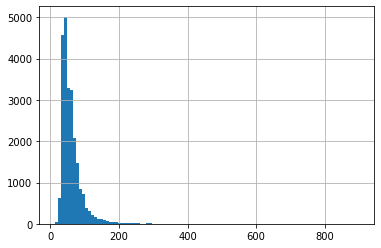

In [9]:
data['total_area'].hist(bins=100)
print(data['total_area'].describe())

Данные по площади достаточно едины. Есть аномально малые и аномально большие значения, но их не много и сильного влияния не оказывают. Среднее не сильно отличается от медианы.

### Цена

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64


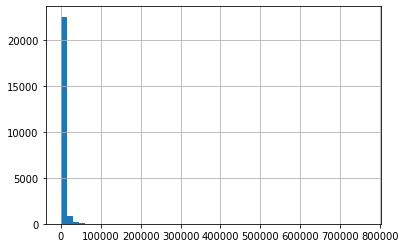

In [10]:
data['last_price'] = data['last_price'] / 1000
data['last_price'].hist(bins=50)
print(data['last_price'].describe())

Для удобства визуализации перевёл цены в тысячи. Также есть аномально низкая и высокая цена. Верхняя аномалия поднимает среднее среднее.

### Колличество комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


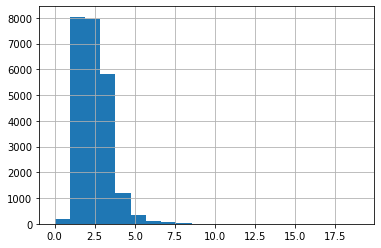

In [11]:
data['rooms'].hist(bins=20)
print(data['rooms'].describe())

Максимальный показатель в 19 выглядит не правдоподобно, но в целом всё в порядке

### Высота потолков

count    23698.000000
mean         2.715305
std          0.990779
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


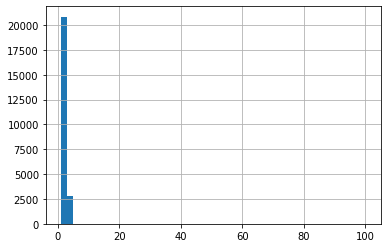

In [12]:
data['ceiling_height'].hist(bins=50)
print(data['ceiling_height'].describe())

Опять же есть аномально низкое минимальное значение в 1.0 и максимальное в 100. Но сильного влияния на остальные данные они не имеют. Среднее практически равно медиане.

### Время продажи квартир

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


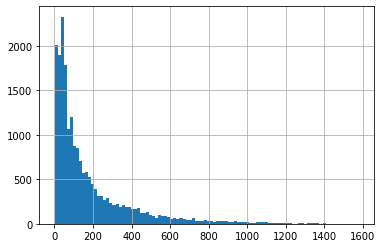

In [13]:
data['days_exposition'].hist(bins=100)
print(data['days_exposition'].describe())

Есть очень быстрые продажи за один день. И слишком долгие до 1580 дней. Это сильно влияет на данные. Среднее 180 почти в два  раза больше медианы 95. Считаю обычным временем продажи от 7 до 400 дней. 

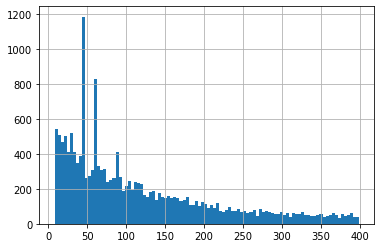

count    15403.000000
mean       122.887100
std         99.979215
min          8.000000
25%         41.000000
50%         94.000000
75%        180.000000
max        399.000000
Name: days_exposition, dtype: float64


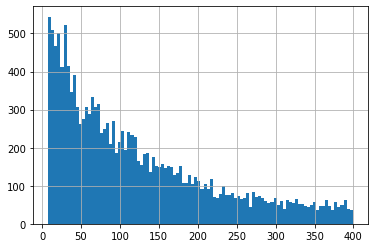

In [14]:
import matplotlib.pyplot as plt

days_share = data.query('days_exposition > 7 and days_exposition < 400')
days_share['days_exposition'].hist(bins=100)
plt.show()
days_share = days_share.drop(days_share[(days_share['days_exposition'] == 45) | (days_share['days_exposition'] == 60) | (days_share['days_exposition'] == 90)].index)
days_share['days_exposition'].hist(bins=100)
print(days_share['days_exposition'].describe())

Сделал срез от 7 до 400 дней. Обнаружил два пика на 45, 60 и 90 день. Возможно это автоматическое снятие с публикации по сроку. В остальном график имеет плавное падение.

###  Факторы влияющие на стоимость кватиры

In [15]:
print(data['total_area'].corr(data['last_price']))

data.groupby('total_area')['last_price'].median().sort_values()


0.6536749599588508


total_area
19.5        945.75
14.0       1190.00
18.8       1350.00
18.5       1500.00
22.4       1600.00
           ...    
410.0    240000.00
285.7    245000.00
618.0    300000.00
401.0    401300.00
900.0    420000.00
Name: last_price, Length: 1449, dtype: float64

Определённо с увеличением площади растёт и цена. Корреляция выше среднего.

In [16]:
print(data['rooms'].corr(data['last_price']))

data.groupby('rooms')['last_price'].median().sort_values()


0.3633428499648953


rooms
0       2700.000
1       3600.000
2       4770.169
3       6200.000
4       9000.000
5      14000.000
6      19000.000
10     23000.000
8      23095.000
9      23750.000
7      24900.000
11     25250.000
14     26829.500
16     28500.000
19     32250.000
15     65000.000
12    420000.000
Name: last_price, dtype: float64

С увеличение колличества комнат соответственно растёт и цена. Корреляция ниже среднего. зависимость цены от колличечтва комнат не высока.

In [17]:
data.groupby('cityCenters_nearest')['last_price'].median().sort_values()


cityCenters_nearest
11122      1190.0
4165       1686.0
41626      1800.0
5238       1800.0
60223      1800.0
           ...   
3794     180000.0
5297     190870.0
6235     245000.0
1073     289238.4
1197     330000.0
Name: last_price, Length: 7642, dtype: float64

Чем ближе к центру тем определённо дороже.

In [18]:
data.groupby('floor_cat')['last_price'].median()


floor_cat
первый    4650.0
Name: last_price, dtype: float64

Меньше всего катируются первые этажи. Цена последних чуть выше. Ну а в середине самые дорогие.

In [19]:
data.groupby('year')['last_price'].median().sort_values()


year
2017    4500.0
2016    4550.0
2018    4550.0
2019    5050.0
2015    5350.0
2014    7700.0
Name: last_price, dtype: float64

 В 2014 были очень высокие цены. Следующие года стали падать, но в 19 снова выросли.

In [20]:
data.groupby('month')['last_price'].median().sort_values()


month
6     4400.0
5     4515.0
8     4570.0
10    4570.0
1     4600.0
2     4650.0
3     4650.0
7     4650.0
9     4700.0
11    4700.0
12    4700.0
4     4800.0
Name: last_price, dtype: float64

 В последнии месяцы года цена чуть выше, но не значительно. Сильной разницы по месяцам нет

In [21]:
data.groupby('first_day_weekday')['last_price'].median().sort_values()


first_day_weekday
6    4550.0
5    4555.0
4    4585.0
0    4650.0
3    4650.0
2    4700.0
1    4730.0
Name: last_price, dtype: float64

А вот от дня подачи объявления практически ни чего не зависит.

### Топ 10

In [22]:
city = data['locality_name'].value_counts().head(10)

city


Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

locality_name
Санкт-Петербург      114849.017365
Пушкин               103125.818428
деревня Кудрово       92472.013378
посёлок Парголово     90177.207951
посёлок Мурино        85752.528736
посёлок Шушары        78678.009091
Колпино               75424.322485
Гатчина               68746.061889
Всеволожск            68655.364322
Выборг                58141.780591
Name: price_metr, dtype: float64


['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

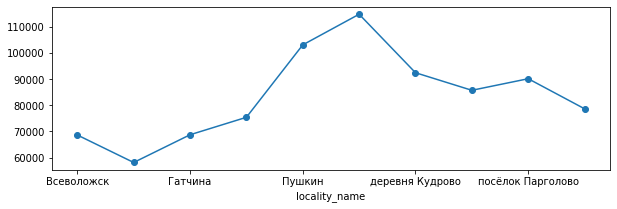

In [23]:
citi_name = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']      
data_filtr = data['locality_name'].isin(citi_name)
city_fitr = data[data_filtr]
citi_top = city_fitr.groupby('locality_name')['price_metr'].mean()

print(citi_top.sort_values(ascending=False).head(10))

citi_top.plot(style='o-', figsize=(10, 3))

citi_name


Нашёл топ 10 по популярности. Прощитал среднюю стоймость кв. метра в этих населённых пунктах. Соответственно В Санкт-Петербурге самое доргое жильё, а в Выборге самое дешовое.

In [24]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
pd.set_option('mode.chained_assignment', None)
data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest'] / 1000)

centr_km = data_spb.groupby('cityCenters_km')['last_price'].median().sort_values()
centr_km

cityCenters_km
11.122      1190.0
4.165       1686.0
5.238       1800.0
5.639       1900.0
2.111       2100.0
            ...   
3.794     180000.0
5.297     190870.0
6.235     245000.0
1.073     289238.4
1.197     330000.0
Name: last_price, Length: 6299, dtype: float64

 Устойчевый рост по мере приближения.

### Поиск центра города

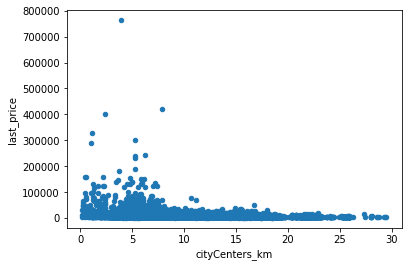

<AxesSubplot:xlabel='cityCenters_km'>

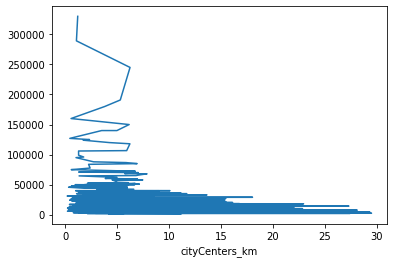

In [25]:
data_spb.plot(x='cityCenters_km', y='last_price', kind='scatter')
plt.show()

centr_km.plot()

По графику видим скачок цены на уровне 7км. от центра. Так что область менее 7км. можно считать цетром.

### Влияние на цены в центре

In [26]:
data_spb_center = data_spb.query('cityCenters_km < 7')

print(data_spb_center['total_area'].corr(data_spb_center['last_price']))
data_spb_center.groupby('total_area')['last_price'].median().sort_values()

0.6075769272535283


total_area
13.2       1686.0
17.0       1900.0
16.0       2100.0
23.0       2176.0
138.7      2200.0
           ...   
268.0    190870.0
410.0    240000.0
285.7    245000.0
618.0    300000.0
401.0    401300.0
Name: last_price, Length: 1075, dtype: float64

Корреляция так же выше среднего, но не много меньше чем во всех квартирах.

In [27]:
print(data_spb_center['rooms'].corr(data_spb_center['last_price']))
data_spb_center.groupby('rooms')['last_price'].median().sort_values()

0.3098733910278382


rooms
0      5200.0
1      6100.0
2      7800.0
3     10000.0
4     12000.0
5     14800.0
6     19500.0
8     21045.0
7     24900.0
11    25250.0
10    27750.0
16    28500.0
14    28659.0
9     29000.0
19    32250.0
15    65000.0
Name: last_price, dtype: float64

 Зависимость есть, но так же меньше чем в общем иследовании.

In [28]:
data_spb_center.groupby('cityCenters_nearest')['last_price'].median().sort_values()

cityCenters_nearest
4165      1686.0
5238      1800.0
5639      1900.0
2111      2100.0
2903      2385.0
          ...   
3794    180000.0
5297    190870.0
6235    245000.0
1073    289238.4
1197    330000.0
Name: last_price, Length: 1770, dtype: float64

 Внутри центрального кольца зависимость от растояния на много меньше.

In [29]:
data_spb_center.groupby('floor_cat')['last_price'].median()

floor_cat
первый    9300.0
Name: last_price, dtype: float64

 Конечно, как и в общем иследовании первые этажи уступают, но разница по ценам намного больше.

In [30]:
data_spb_center.groupby('year')['last_price'].median().sort_values()

year
2018     8925.0
2017     9125.0
2016     9400.0
2019     9949.5
2015    10500.0
2014    19800.0
Name: last_price, dtype: float64

  Так же самые большие цены были 2014. С2015 цены стали падать, но 2019 произошёл скачёк цен.

In [31]:
data_spb_center.groupby('month')['last_price'].median().sort_values()

month
6      8600.0
10     8700.0
12     8800.0
8      8970.0
5      8980.0
7      9250.0
4      9300.0
3      9490.0
2      9510.0
11     9590.0
9      9925.0
1     10350.0
Name: last_price, dtype: float64

 Чуть выше цена при подачи оъявления в январе, по остальным месяцам разница не существенна.

In [32]:
data_spb_center.groupby('first_day_weekday')['last_price'].median().sort_values()

first_day_weekday
5    8900.0000
4    9020.0000
1    9286.3825
2    9395.0000
3    9410.0000
0    9500.0000
6    9500.0000
Name: last_price, dtype: float64

 При подачи объявления в субботу средняя цена чуть меньше. В остальном разница не велика.

## Общий вывод


    
1. Факторов влияющих на стоймость квартиры очень много. 
 
2. Самое большое влияние имеет площадь квартиры. 
    
3. За линией центра приближонность к ней имеет намного большее влияние, чем уже внутри этой линии.  
    
4. Из за множества факторов влияющих и соответственно данных, обработка и анализ затрудненны. 
    
5. Часть данных заносится из объявлений, которые подают сами продавцы. Из за этого много неточностей и артефактов в данных.